In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
path='ranking/v2/'
ass='rank_mi_dplweights.csv'
meanpath='mean_std/mean_midfieldv2clustering.csv'

In [36]:
def scaleranking(df, column_name):
    x_min=df[column_name].min()
    x_max=df[column_name].max()
    print(x_min,x_max)
    
    df['scaled_'+column_name]=((df[column_name] - x_min) * 100) / (x_max - x_min)
    return df

In [49]:
ranking=pd.read_csv(path+ass)

In [ ]:
pd.read_csv(meanpath)

In [50]:
for i in range(4):
    name='Res'+str(i)+'def'
    ranking=scaleranking(ranking, name)

-81.5902949707258 167.3425436799412
-61.70836513258556 284.5544723000032
-56.8410717670112 290.93174449749523
-56.26972451326676 377.5206847086522


In [ ]:
ranking

In [33]:
index0=np.array(ranking['scaled_Res0def'])

In [39]:
index1=np.array(ranking['scaled_Res2def'])

In [46]:
index2=np.array(ranking['scaled_Res1def'])

In [51]:
index3=np.array(ranking['scaled_Res0def'])

In [52]:
ranking['def_playmaker']=index3
ranking.to_csv('ranking_mi_dpl.csv')

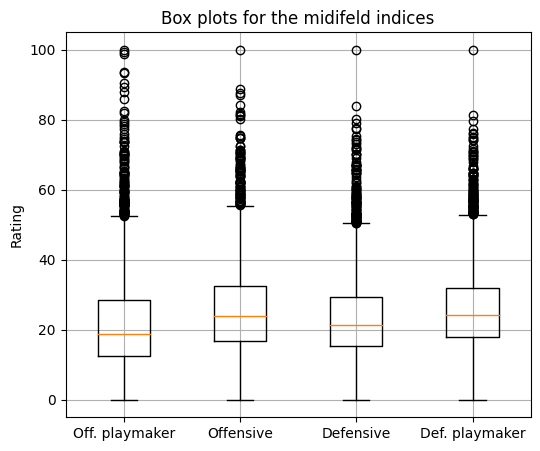

In [53]:
vector1 = index0
vector2 = index1
vector3 = index2
vector4 = index3
figurename='midfieldbox.png'

# Create a list of the vectors
vectors = [vector1, vector2, vector3, vector4]

# Create a boxplot for each vector side by side
plt.figure(figsize=(6, 5))
plt.boxplot(vectors, labels=['Off. playmaker', 'Offensive', 'Defensive', 'Def. playmaker'])
plt.title('Box plots for the midifeld indices')
plt.ylabel('Rating')
plt.grid(True)
plt.savefig(figurename)
plt.show()

In [ ]:
vector1 = index0
vector2 = index1
figurename='defenderbox.png'

# Create a list of the vectors
vectors = [vector1, vector2]

# Create a boxplot for each vector side by side
plt.figure(figsize=(6, 5))
plt.boxplot(vectors, labels=['Defensive', 'Offensive'])
plt.title('Box plots for the centre-back indices')
plt.ylabel('Rating')
plt.grid(True)
plt.savefig(figurename)
plt.show()

In [ ]:
ranking=ranking.sort_values(by='scaled_Res1def', ascending=False)